In [1]:
# get tensorflow data sets
import tensorflow_datasets as tfds

In [2]:
# get all available datasets in TFDS

datasets_list = tfds.list_builders()
datasets_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [3]:
for dataset in datasets_list:
  if(dataset== "food101"):
    print('Food 101 dataset is available')

Food 101 dataset is available


In [4]:
# load the food101 dataset

(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9JJ4O7/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9JJ4O7/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [5]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [6]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [7]:
# take one sample of the trianing data
train_one_sample=train_data.take(1)

In [8]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [9]:
for image,label in train_one_sample:
  print('image shape is ',image.shape)
  print('label shape is ',label.shape)
  print("class name is ",class_names[label.numpy()])

image shape is  (512, 289, 3)
label shape is  ()
class name is  frozen_yogurt


In [10]:
image

<tf.Tensor: shape=(512, 289, 3), dtype=uint8, numpy=
array([[[145, 151, 125],
        [157, 163, 137],
        [159, 165, 139],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [197, 207, 198]],

       [[146, 152, 126],
        [156, 162, 136],
        [158, 164, 138],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [199, 209, 200]],

       [[150, 156, 130],
        [155, 161, 135],
        [157, 163, 137],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [199, 209, 198]],

       ...,

       [[173, 186, 177],
        [174, 187, 178],
        [176, 189, 180],
        ...,
        [181, 197, 187],
        [181, 197, 187],
        [178, 195, 187]],

       [[176, 187, 179],
        [176, 187, 179],
        [176, 189, 180],
        ...,
        [182, 198, 188],
        [182, 198, 188],
        [180, 197, 189]],

       [[178, 189, 181],
        [177, 188, 180],
        [175, 188, 179],
        ...,
        [179, 195, 18

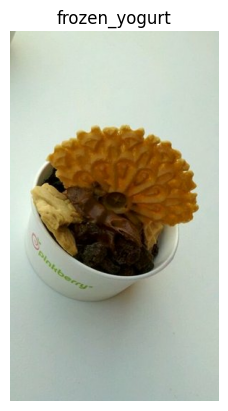

In [11]:
# plot an image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [12]:
# in the models data to be float32 datatype and have all of the same size tensors and all are normalized
import tensorflow as tf

def preprocessing_img(image,label,image_shape=224):
  image = tf.image.resize(image,[image_shape,image_shape])
  return tf.cast(image,tf.float32),label

In [13]:
preprocessed_img = preprocessing_img(image,label)[0]

In [14]:
preprocessed_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[147.19739, 153.19739, 127.19739],
        [157.22768, 163.22768, 137.22768],
        [158.09805, 164.09805, 138.09805],
        ...,
        [197.     , 209.     , 197.54907],
        [197.     , 209.     , 199.     ],
        [198.09914, 208.38936, 199.24425]],

       [[154.69467, 160.69467, 134.69467],
        [155.87053, 161.87053, 135.87053],
        [158.39908, 164.39908, 138.39908],
        ...,
        [197.     , 209.     , 197.54907],
        [197.     , 209.     , 199.     ],
        [196.32831, 206.61853, 195.76364]],

       [[154.56473, 158.56473, 133.56473],
        [153.49234, 158.17635, 132.83435],
        [157.76036, 163.3318 , 137.54608],
        ...,
        [197.     , 209.     , 197.54907],
        [197.     , 209.     , 197.87054],
        [197.85489, 208.51149, 197.1832 ]],

       ...,

       [[176.88599, 189.88599, 180.88599],
        [175.68573, 188.96552, 179.87225],
        [174.84456, 188.487

Text(0.5, 1.0, 'frozen_yogurt')

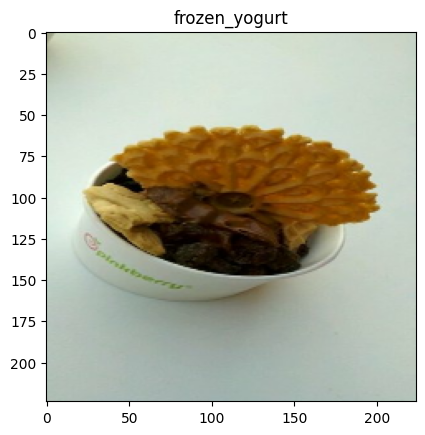

In [15]:
#preprocessed_img = preprocessed_img/255.
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])

In [16]:
# map preprocessing function to the each data
train_data = train_data.map(map_func=preprocessing_img,num_parallel_calls=tf.data.AUTOTUNE)

# shuffle the data
train_data = train_data.shuffle(buffer_size=1000)

# create an data into batches
train_data = train_data.batch(batch_size=32)

# prefetch the data
train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE) # it will preloads the next batch of data while the current batch is being processed

In [17]:
# map preprocessing function to the each test data
test_data = test_data.map(map_func=preprocessing_img,num_parallel_calls=tf.data.AUTOTUNE)

# shuffle the test data
test_data = test_data.shuffle(buffer_size=1000)

# create an data into the batches
test_data = test_data.batch(32)

# prefetch the test data
test_data = test_data.prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):

  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [19]:
checkpoint_path = "model_checkpoints/cp.ckpt"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

In [20]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy(policy="mixed_float16")

In [21]:
# download the base model and freeze the underlying layers

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

16705208/16705208 [==============================] - 0s 0us/step


In [22]:
# create the functional API
input_shape = (224,224,3)
inputs = tf.keras.layers.Input(shape=input_shape,name="input_layer")
x = base_model(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(len(class_names))(x)
outputs = tf.keras.layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)

model = tf.keras.Model(inputs,outputs)

# compile the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

# use sparse categorical cross entropy when labels are not encoded

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [24]:
history_101_food_classes = model.fit(train_data,
                                     epochs=3,
                                     steps_per_epoch=len(train_data),
                                     validation_data=test_data,
                                     validation_steps=int(0.15*len(test_data)),
                                     callbacks=[create_tensorboard_callback("training_Logs","efficientnetb0_classes"),
                                                model_checkpoint])

Saving TensorBoard log files to: training_Logs/efficientnetb0_classes/20240529-170443
Epoch 1/3
2368/2368 [==============================] - 195s 77ms/step - loss: 3.0182 - accuracy: 0.3944 - val_loss: 2.0305 - val_accuracy: 0.5787
Epoch 2/3
2368/2368 [==============================] - 180s 75ms/step - loss: 1.9299 - accuracy: 0.5726 - val_loss: 1.5710 - val_accuracy: 0.6374
Epoch 3/3
2368/2368 [==============================] - 169s 70ms/step - loss: 1.6418 - accuracy: 0.6141 - val_loss: 1.3941 - val_accuracy: 0.6618


In [25]:
result_model = model.evaluate(test_data)
result_model

790/790 [==============================] - 55s 68ms/step - loss: 1.4046 - accuracy: 0.6600


[1.4046002626419067, 0.6600000262260437]

In [26]:
for layer in model.layers[1].layers[:20]:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [27]:
# save the model to the file

save_dir = "efficientnetb0_model_mixed_precision"
model.save(save_dir)

In [28]:
# load the model that we have saved previously

loaded_saved_model = tf.keras.models.load_model(save_dir)
loaded_saved_model

In [29]:
for layer in loaded_saved_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <P

In [30]:
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

790/790 [==============================] - 62s 74ms/step - loss: 1.4046 - accuracy: 0.6600


[1.4046014547348022, 0.6600000262260437]

Fine Tuning

In [31]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2024-05-29 17:18:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 142.251.162.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  65.0MB/s    in 0.2s    

2024-05-29 17:18:02 (65.0 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [32]:
!mkdir downloaded_gs_model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [33]:
loaded_gs_model = tf.keras.models.load_model("downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

In [34]:
loaded_gs_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [35]:
results_loaded_gs_model = loaded_gs_model.evaluate(test_data)
results_loaded_gs_model

790/790 [==============================] - 56s 66ms/step - loss: 1.0881 - accuracy: 0.7066


[1.0880993604660034, 0.7066138386726379]

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [37]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2,
                                                 patience=2,verbose=1,
                                                 min_lr=1e-7)

In [38]:
loaded_gs_model.compile(loss="sparse_categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(0.0001),
                        metrics=["accuracy"])

In [40]:
history_101_food_classes_all_data_fine_tune = loaded_gs_model.fit(train_data,
                                                        epochs=5,
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)),
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"),
                                                                   early_stopping,
                                                                   reduce_lr])

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20240529-172746
Epoch 1/5
2368/2368 [==============================] - 169s 69ms/step - loss: 0.9362 - accuracy: 0.7616 - val_loss: 1.0374 - val_accuracy: 0.7211 - lr: 1.0000e-04
Epoch 2/5
2368/2368 [==============================] - 169s 70ms/step - loss: 0.9273 - accuracy: 0.7649 - val_loss: 1.0496 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 3/5
2367/2368 [============================>.] - ETA: 0s - loss: 0.9189 - accuracy: 0.7669
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 168s 70ms/step - loss: 0.9189 - accuracy: 0.7669 - val_loss: 1.0522 - val_accuracy: 0.7177 - lr: 1.0000e-04
Epoch 4/5
2368/2368 [==============================] - 166s 69ms/step - loss: 0.9022 - accuracy: 0.7718 - val_loss: 1.0456 - val_accuracy: 0.7219 - lr: 2.0000e-05


In [41]:
# save the model
loaded_gs_model.save("07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

In [42]:
loaded_gs_model.evaluate(test_data)

790/790 [==============================] - 54s 66ms/step - loss: 1.0376 - accuracy: 0.7219


[1.037583827972412, 0.7219405770301819]